# Data Cleaning and Merge in order to make Recommendations

Import libraries and data.

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [9]:
tn = pd.read_csv('Data/tn_data')
imdb = pd.read_csv('Data/imdb_data')

Change the name of the columns so that financial data only states 'domestic' or 'worldwide'

In [62]:
tn = tn.rename(columns={'ROI': 'worldwide_ROI', 'total profit': 'worldwide_profit', 'total profit margin': 'worldwide_profit_margin'})

###### We now want to add a month column in order to see when is the best time to release movies.

In [43]:
# My release_date object is an object(string), So I can use the slice method to select the specific index of the month.

tn['month'] = tn['release_date'].str.slice(start=5, stop=7)

In [63]:
tn.head()

,movie_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic profit,domestic profit margin,worldwide_profit_margin,month
0,avatar2009,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577,335507625,0.441163,0.846921,12
1,pirates of the caribbean: on stranger tides2011,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,-169536125,-0.703283,0.607331,05
2,dark phoenix2019,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-307237650,-7.184770,-1.337036,06
3,avengers: age of ultron2015,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,128405868,0.279748,0.764364,05
4,star wars ep. viii: the last jedi2017,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,303181382,0.488859,0.759251,12


In [105]:
tn.groupby('month').mean()

,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic profit,domestic profit margin,worldwide_profit_margin
month,,,,,,,,,
01,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.748105e+07,3.442220,3.556879e+06,-inf,-29.400178
02,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,4.660489e+07,3.818222,8.326750e+06,-inf,-10.868250
03,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,5.345160e+07,3.753031,8.523460e+06,-inf,-9.465710
04,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.803360e+07,2.959893,3.861069e+06,-inf,-11.492099
05,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,1.193637e+08,4.541651,2.038911e+07,-inf,-47.946271
06,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,1.038913e+08,7.233493,2.385438e+07,-inf,-5.983136
07,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,1.022654e+08,5.268042,1.900208e+07,-inf,-3.272318
08,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.748495e+07,4.642001,7.273825e+06,-inf,-18.058270
09,48.381974,2.272352e+07,2.449119e+07,4.939912e+07,2.667560e+07,3.046102,1.767673e+06,-inf,-21.228033


In [47]:
tn['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [35]:
tn['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64

###### worldwide_gross has almost 200 less zeroes than domesetic_gross.

My team and I have decided that worldwide_gross will be more effective in determining profit.

We have decided to drop all rows where worldwide_gross = zero because we have no way to tell if those are place holders or if they are movies that really have zero profit. 

In [56]:
#We are overwriting the dataframe to one where we drop all rows where 
#there is 0 in the 'worldwide_gross' column.

tn.drop(tn[tn['worldwide_gross'] == 0].index, inplace=True)

In [58]:
tn['worldwide_gross'].value_counts()

8000000      9
2000000      6
7000000      6
9000000      4
4000000      4
            ..
166000000    1
42843521     1
101173038    1
478595       1
104267443    1
Name: worldwide_gross, Length: 5355, dtype: int64

#### we lost 367 records but our worldwide profit data should be alot more accurate.

In [68]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_id                 5415 non-null   object 
 1   id                       5415 non-null   int64  
 2   release_date             5415 non-null   object 
 3   movie                    5415 non-null   object 
 4   production_budget        5415 non-null   int64  
 5   domestic_gross           5415 non-null   int64  
 6   worldwide_gross          5415 non-null   int64  
 7   worldwide_profit         5415 non-null   int64  
 8   worldwide_ROI            5415 non-null   float64
 9   domestic profit          5415 non-null   int64  
 10  domestic profit margin   5415 non-null   float64
 11  worldwide_profit_margin  5415 non-null   float64
 12  month                    5415 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 592.3+ KB


In [77]:
tn['production_budget'].value_counts()

20000000    227
10000000    206
30000000    176
15000000    171
25000000    168
           ... 
87000000      1
15250000      1
16400000      1
103000        1
28500000      1
Name: production_budget, Length: 486, dtype: int64

### Now we need to clean the imdb dataset to prepare it for the merge

In [60]:
imdb.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
1,one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
2,the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
3,sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
4,the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [64]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  114405 non-null  float64
 3   genres           140736 non-null  object 
 4   averagerating    73856 non-null   float64
 5   numvotes         73856 non-null   float64
dtypes: float64(3), object(3)
memory usage: 6.7+ MB


In [65]:
# drop rows with missing values in the numvotes column
imdb = imdb.dropna(axis=0, subset=['numvotes'])

In [66]:
# drop duplicate movie_id's if they don't have the max number of votes for that movie_id
max_votes_id = imdb.groupby('movie_id')['numvotes'].transform(max) == imdb['numvotes']
imdb = imdb[max_votes_id]

In [67]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73267 entries, 0 to 146134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73267 non-null  object 
 1   primary_title    73267 non-null  object 
 2   runtime_minutes  65720 non-null  float64
 3   genres           72475 non-null  object 
 4   averagerating    73267 non-null  float64
 5   numvotes         73267 non-null  float64
dtypes: float64(3), object(3)
memory usage: 3.9+ MB


In [69]:
imdb_tn = imdb.merge(tn, on='movie_id')

In [78]:
imdb_tn.head(20)

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic profit,domestic profit margin,worldwide_profit_margin,month
0,foodfight!2012,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248.0,26,2012-12-31,Foodfight!,45000000,0,73706,-44926294,-0.998362,-45000000,-inf,-609.533742,12
1,the secret life of walter mitty2013,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,1.064409,-32763162,-0.562585,0.515600,12
2,a walk among the tombstones2014,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,34108587,1.218164,-1982315,-0.076191,0.549177,09
3,jurassic world2015,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,6.669092,437270625,0.670382,0.869606,06
4,the rum diary2011,The Rum Diary,119.0,"Comedy,Drama",6.2,94787.0,16,2011-10-28,The Rum Diary,45000000,13109815,21544732,-23455268,-0.521228,-31890185,-2.432543,-1.088678,10
5,the three stooges2012,The Three Stooges,92.0,"Comedy,Family",5.1,28570.0,4,2012-04-13,The Three Stooges,30000000,44338224,54052249,24052249,0.801742,14338224,0.323383,0.444981,04
6,tangled2010,Tangled,100.0,"Adventure,Animation,Comedy",7.8,366366.0,15,2010-11-24,Tangled,260000000,200821936,586477240,326477240,1.255682,-59178064,-0.294679,0.556675,11
7,john carter2012,John Carter,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0,14,2012-03-09,John Carter,275000000,73058679,282778100,7778100,0.028284,-201941321,-2.764098,0.027506,03
8,dinner for schmucks2010,Dinner for Schmucks,114.0,Comedy,5.9,91546.0,51,2010-07-30,Dinner for Schmucks,69000000,73026337,86796502,17796502,0.257920,4026337,0.055135,0.205037,07
9,the a-team2010,The A-Team,117.0,"Action,Adventure,Thriller",6.8,235256.0,32,2010-06-11,The A-Team,110000000,77222099,177241171,67241171,0.611283,-32777901,-0.424463,0.379377,06


<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

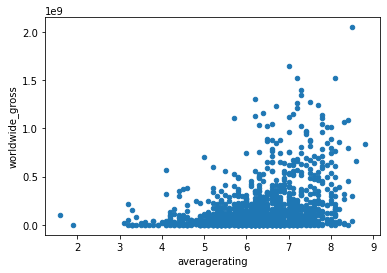

In [96]:
imdb_tn.plot.scatter(x='averagerating', y='worldwide_gross')

<AxesSubplot:xlabel='numvotes', ylabel='worldwide_gross'>

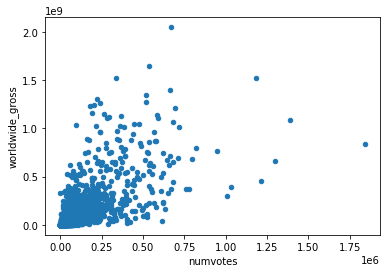

In [98]:
imdb_tn.plot.scatter(x='numvotes', y='worldwide_gross')

In [92]:
import numpy as np


In [97]:
np.corrcoef(imdb_tn['numvotes'], imdb_tn['worldwide_gross'])

array([[1.        , 0.64561929],
       [0.64561929, 1.        ]])

In [99]:
np.corrcoef(imdb_tn['averagerating'], imdb_tn['worldwide_gross'])

array([[1.        , 0.29485987],
       [0.29485987, 1.        ]])